# Themes

## Introduction

- elements, like `plot.title`, `legend.key.height`...
- associated element function, like `element_text()` to set the font size
- `theme()`, use it like `theme(plot.title = element_text(colour = "red"))`
- Complete themes, like `theme_grey()`

In [2]:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)
options(warn=-1)

# multiplot function from Cookbook for R by Winston Chang
# modified by Yuanxing Cheng
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL, res=180, width=0) {
    library(grid)

    # Make a list from the ... arguments and plotlist
    plots <- c(list(...), plotlist)

    numPlots = length(plots)
    if (width>0){
        options(repr.plot.width=width, repr.plot.height=2*max(ceiling(numPlots/ncol),1), repr.plot.res=res)
    } else{
        options(repr.plot.width=min(9,3*ncol), repr.plot.height=2*max(ceiling(numPlots/ncol),1), repr.plot.res=res)   
    }

    # If layout is NULL, then use 'ncol' to determine layout
    if (is.null(layout)) {
        # Make the panel
        # ncol: Number of columns of plots
        # nrow: Number of rows needed, calculated from # of column
        layout <- matrix(
            seq(1, ncol * ceiling(numPlots/ncol)),
            ncol = ncol, nrow = ceiling(numPlots/ncol),
            byrow=TRUE # set byrow=TRUE will make the subplots listed by row
        )
    }

    if (numPlots==1) {
        print(plots[[1]])
    } else {
        # Set up the page
        grid.newpage()
        pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

        # Make each plot, in the correct location
        for (i in 1:numPlots) {
            # Get the i,j matrix positions of the regions that contain this subplot
            matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
            print(
                plots[[i]],
                vp = viewport(
                    layout.pos.row = matchidx$row,
                    layout.pos.col = matchidx$col
                )
            )
        }
    }
}
myTheme = theme(
    plot.title = element_text(size = rel(0.5)), 
    axis.title = element_text(size = rel(0.8)), 
    legend.title = element_text(size = rel(0.8)),
    legend.key.size = unit(2.2,'mm')
)

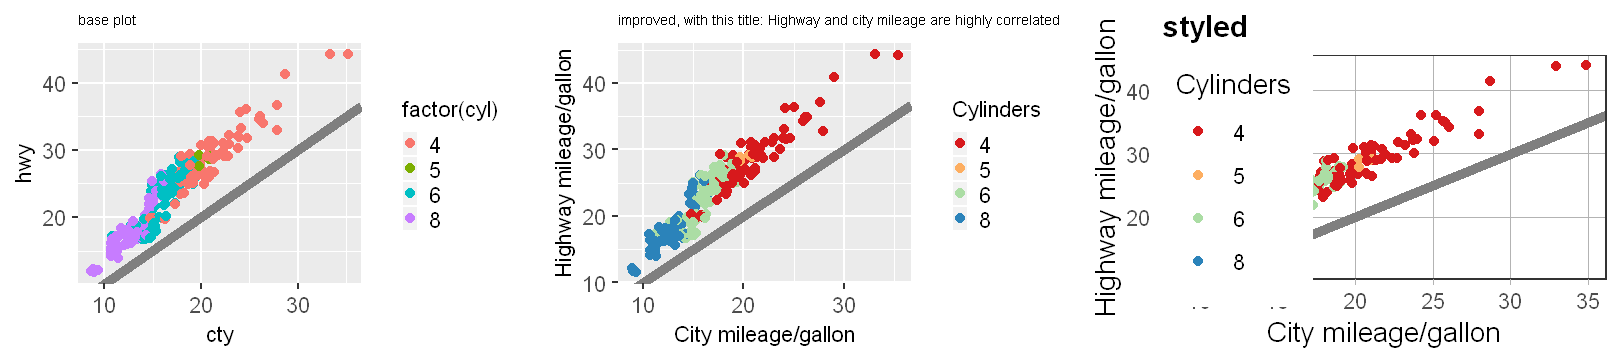

In [3]:
base <- ggplot(mpg, aes(cty, hwy, color = factor(cyl))) +
geom_jitter() + 
geom_abline(colour = "grey50", size = 2) + myTheme

p1 <- base + ggtitle("base plot")

labelled <- base +
labs(
    x = "City mileage/gallon",
    y = "Highway mileage/gallon",
    colour = "Cylinders",
    title = "Highway and city mileage are highly correlated"
) +
scale_colour_brewer(type = "seq", palette = "Spectral")

p2 <- labelled + ggtitle("improved, with this title: Highway and city mileage are highly correlated")

styled <- labelled +
theme_bw() + 
theme(
    plot.title = element_text(face = "bold", size = 12),
    legend.background = element_rect(fill = "white", size = 4, colour = "white"),
    legend.justification = c(0, 1),
    legend.position = c(0, 1),
    axis.ticks = element_line(colour = "grey70", size = 0.2),
    panel.grid.major = element_line(colour = "grey70", size = 0.2),
    panel.grid.minor = element_blank()
)
p3 <- styled + ggtitle("styled")

multiplot(p1,p2,p3,ncol=3)

theme_bw() is a complete theme

## Complete themes

see below figures

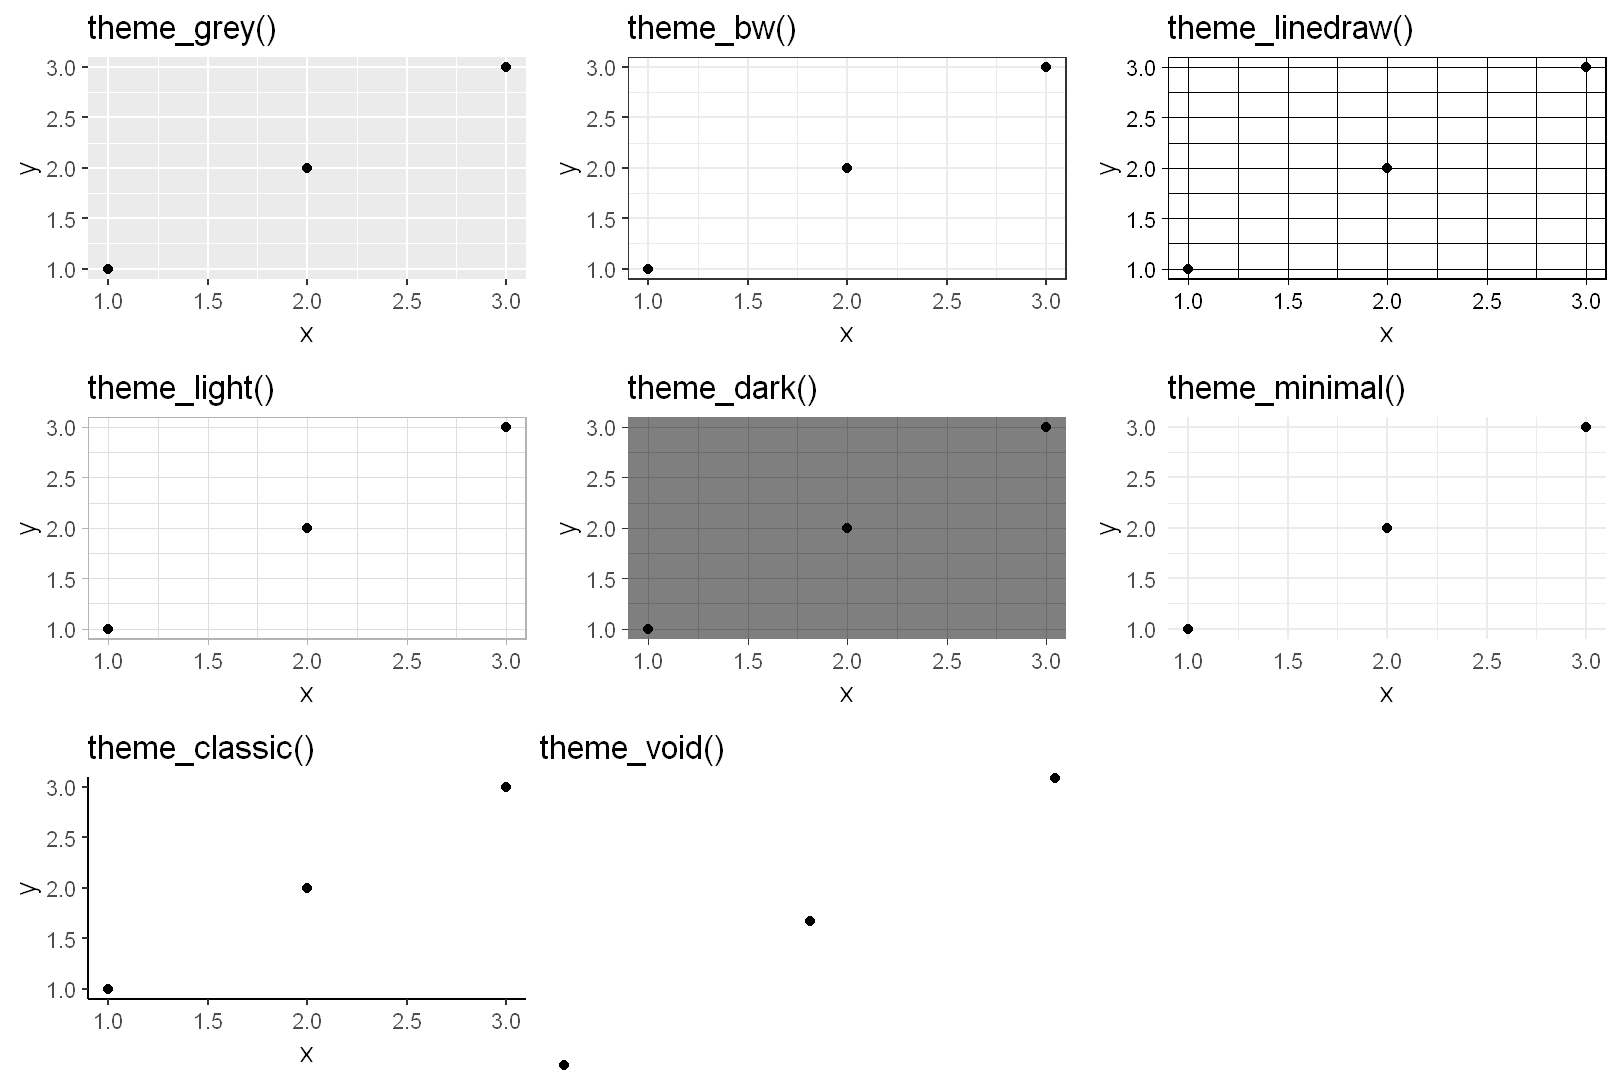

In [4]:
df <- data.frame(x = 1:3, y = 1:3)
base <- ggplot(df, aes(x, y)) + geom_point()
p1 <- base + theme_grey() + ggtitle("theme_grey()")
p2 <- base + theme_bw() + ggtitle("theme_bw()")
p3 <- base + theme_linedraw() + ggtitle("theme_linedraw()")
p4 <- base + theme_light() + ggtitle("theme_light()")
p5 <- base + theme_dark() + ggtitle("theme_dark()")
p6 <- base + theme_minimal()  + ggtitle("theme_minimal()")
p7 <- base + theme_classic() + ggtitle("theme_classic()")
p8 <- base + theme_void() + ggtitle("theme_void()")

multiplot(p1,p2,p3,p4,p5,p6,p7,p8,ncol = 3)

All themes have a `base_size` parameter which controls the base font size. 

- axis title: base font size
- plot title: 1.2x
- tick and strip labels: 0.8x

Run `theme_set(theme_bw())` to change default theme

More themes in library `ggthemes`

## Modifying theme components

Modify like `plot + theme(element.name = element_function())`.

- `element_text()` set `family`, `face`, `colour`, `size` (points), `hjust`, `vjust`, `angle` (degrees), `lineheight` (ratio of fontcase), `margin` with `margin()` which takes `t`, `b`, `l`, `r` in points
- `element_line()` draws lines, `colour`, `size` and `linetype` can be set
- `element_rect()` draws rectangles, `fill`, `colour`, `size` and `linetype` can be set
- `element_blank()` draws nothing and takes no space; to leave the space, set `color=NA, fill=NA`

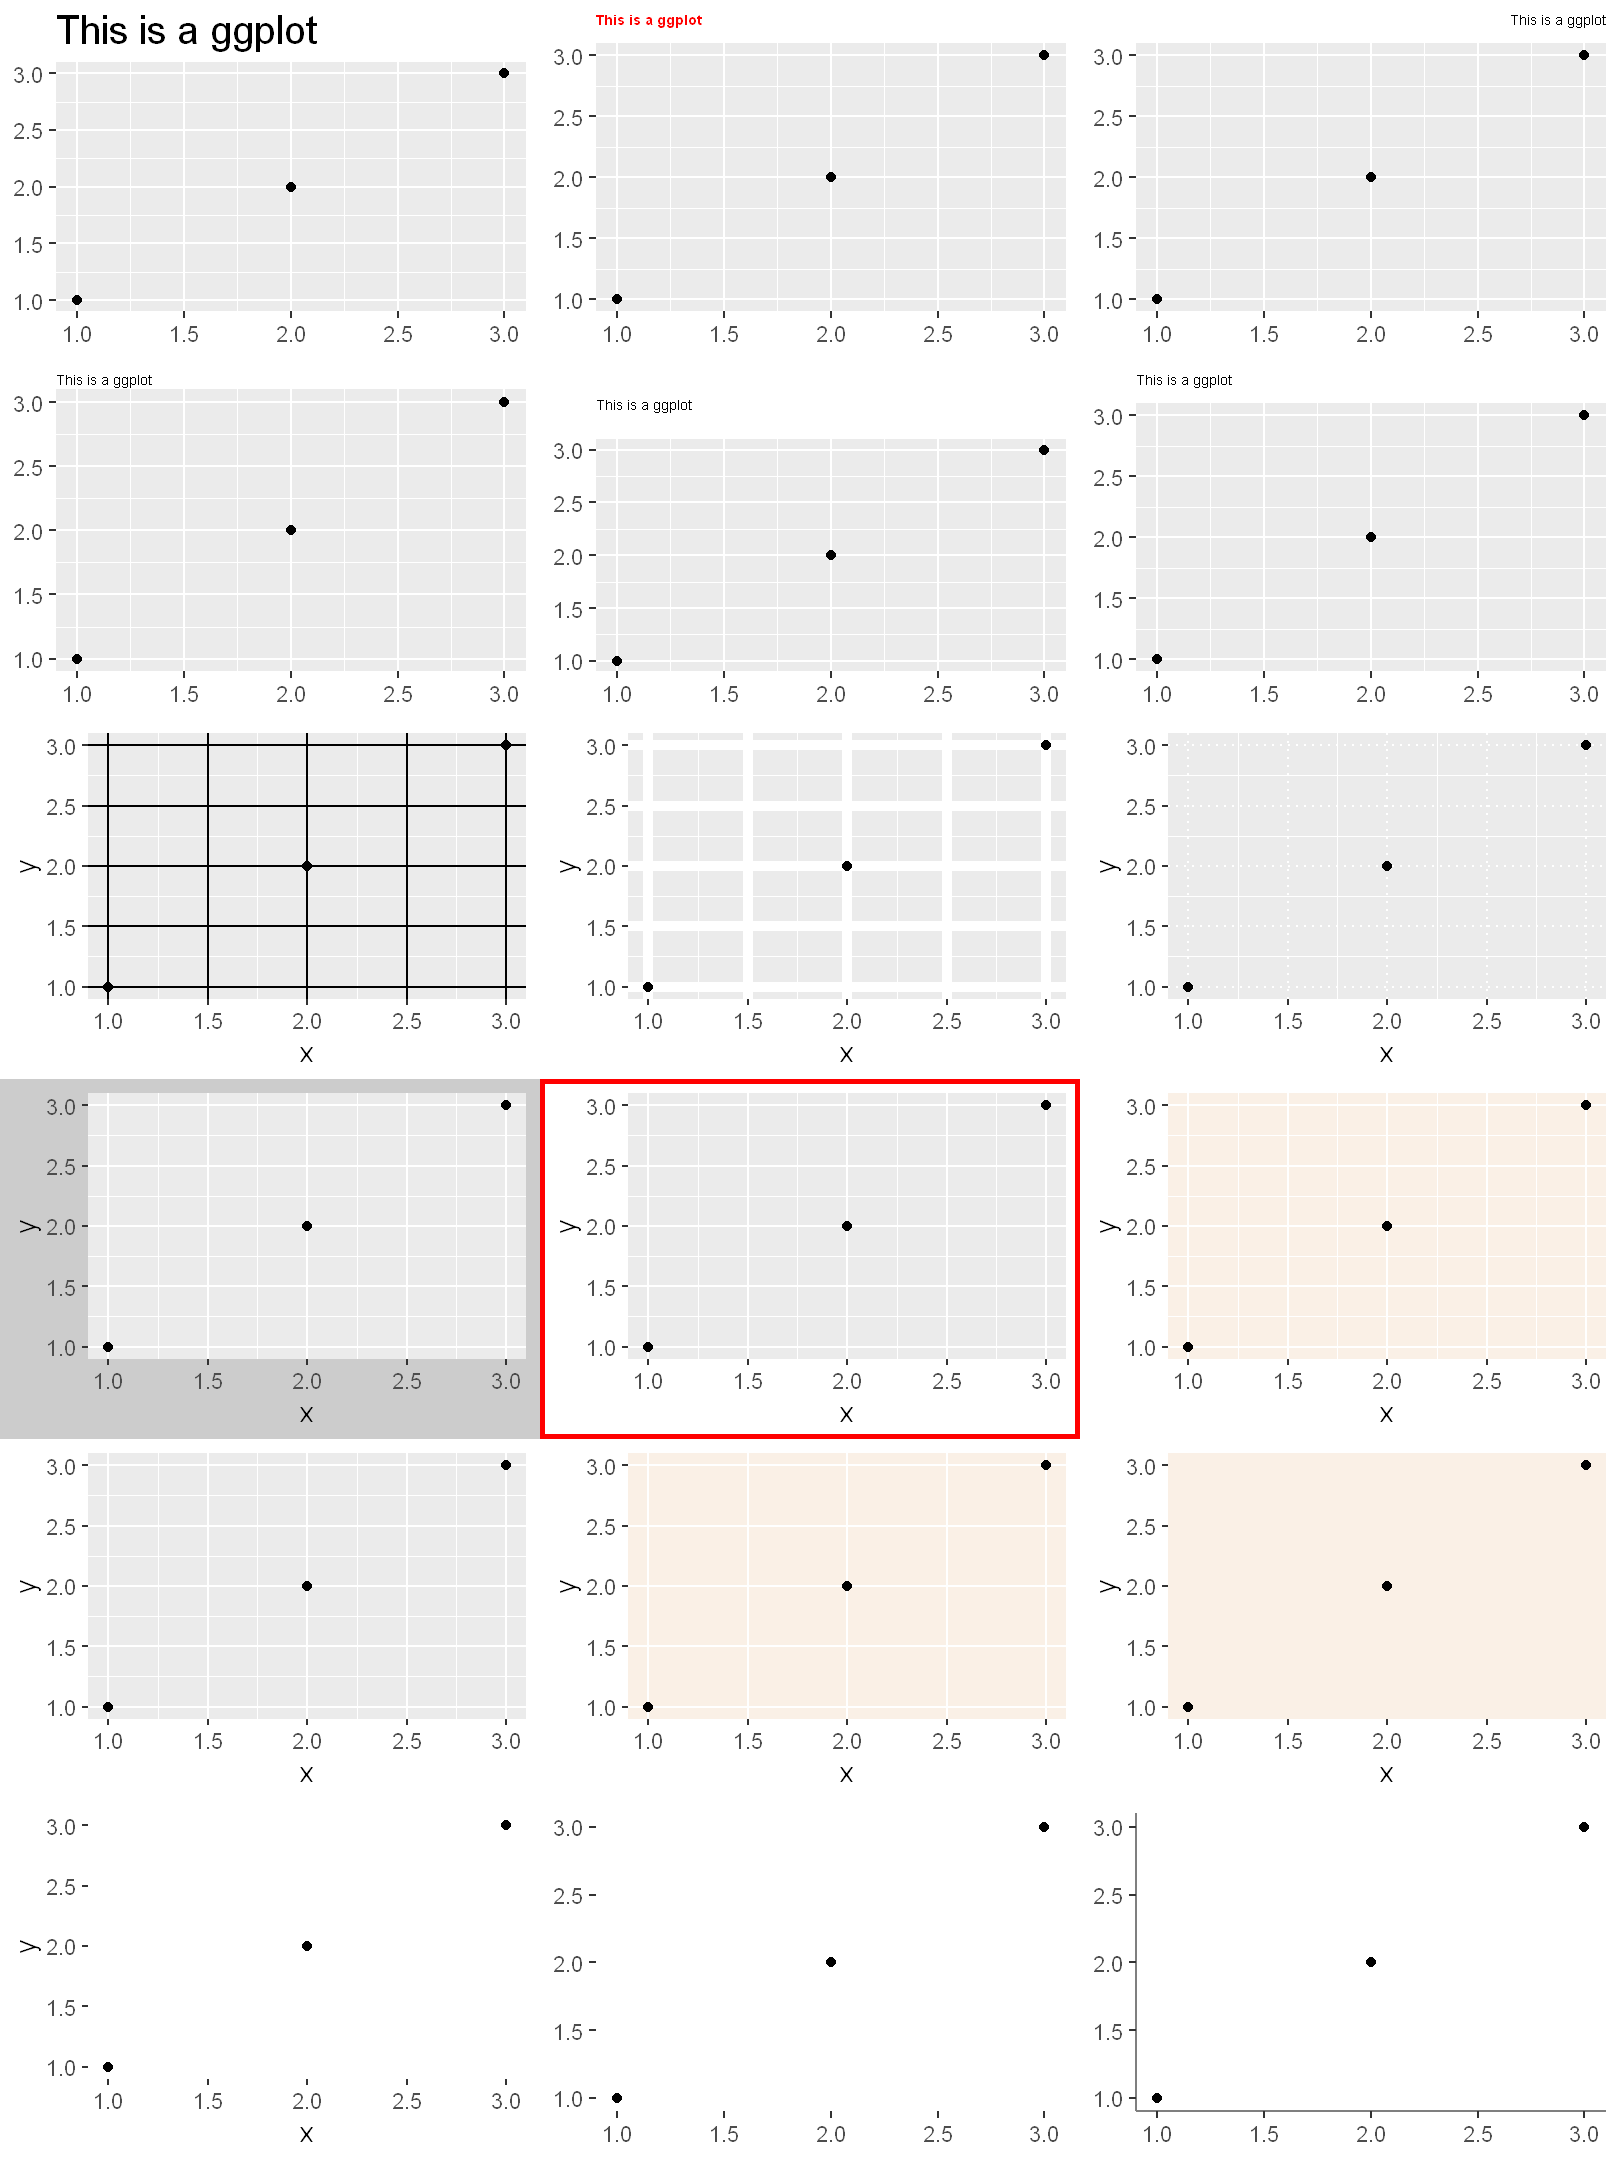

In [9]:
base_t <- base + labs(title = "This is a ggplot") + xlab(NULL) + ylab(NULL) + myTheme
p1 <- base_t + theme(plot.title = element_text(size = 16))
p2 <- base_t + theme(plot.title = element_text(face = "bold", colour = "red"))
p3 <- base_t + theme(plot.title = element_text(hjust = 1))
p4 <- base_t + theme(plot.title = element_text(margin = margin()))
p5 <- base_t + theme(plot.title = element_text(margin = margin(t = 10, b = 10)))
p6 <- base_t + theme(axis.title.y = element_text(margin = margin(r = 10)))
p7 <- base + theme(panel.grid.major = element_line(colour = "black"))
p8 <- base + theme(panel.grid.major = element_line(size = 2))
p9 <- base + theme(panel.grid.major = element_line(linetype = "dotted"))
p0 <- base + theme(plot.background = element_rect(fill = "grey80", colour = NA))
pq <- base + theme(plot.background = element_rect(colour = "red", size = 2))
pw <- base + theme(panel.background = element_rect(fill = "linen"))
pe <- base
pr <- last_plot() + theme(panel.grid.minor = element_blank())
pt <- last_plot() + theme(panel.grid.major = element_blank())
py <- last_plot() + theme(panel.background = element_blank())
pu <- last_plot() + theme(
    axis.title.x = element_blank(), 
    axis.title.y = element_blank()
)
pi<- last_plot() + theme(axis.line = element_line(colour = "grey50"))

multiplot(p1,p2,p3,p4,p5,p6,p7,p8,p9,p0,pq,pw,pe,pr,pt,py,pu,pi,ncol = 3)

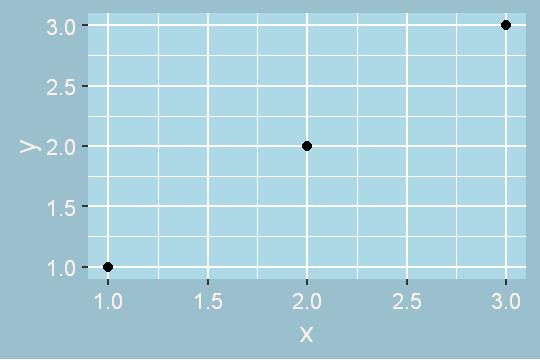

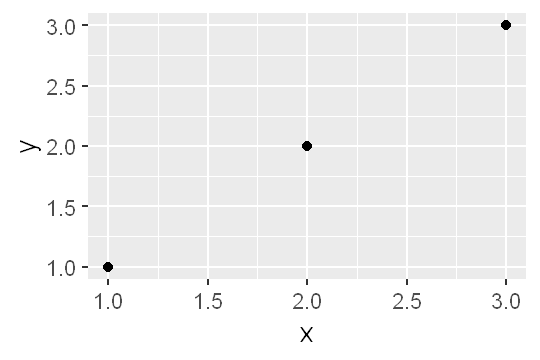

In [11]:
old_theme <- theme_update(
    plot.background = element_rect(fill = "lightblue3", colour = NA),
    panel.background = element_rect(fill = "lightblue", colour = NA),
    axis.text = element_text(colour = "linen"),
    axis.title = element_text(colour = "linen")
)
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res=180)
base
theme_set(old_theme)
base

## Theme elements

see `theme()` docs

## Saving your output

standard R approach

1. open a graphics device
2. generate the plot
3. close the device

```R
pdf("output.pdf", width = 6, height = 6)
ggplot(mpg, aes(displ, cty)) + geom_point()
dev.off()
```

`ggplot2` provide `ggsave()`

```R
ggplot(mpg, aes(displ, cty)) + geom_point()
ggsave("output.pdf")
```

Arguments:

- `path`
- `width` and `height` in inches
- `dpi` for .png, .jpg, these raster images, default with 300